# Load Testing

In [123]:
import time
import psutil
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import cv2
import pandas as pd

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (299, 299))  
    image = np.expand_dims(image, axis=0) 
    image = image / 255.0  
    return image

def get_model_prediction(model, image):
    prediction = model.predict(image)
    if isinstance(prediction, np.ndarray):
        if prediction.ndim == 1:  
            return np.zeros_like(prediction)
        elif prediction.ndim == 2:  
            return prediction
    return np.array([prediction])  

def ensemble_prediction(image_path, models):
    image = preprocess_image(image_path)
    
    predictions = []
    for model in models:
        prediction = get_model_prediction(model, image)
        predictions.append(prediction.flatten())  
    
    avg_prediction = np.mean(predictions, axis=0)
    return np.argmax(avg_prediction) 

def monitor_resources():
    memory_info = psutil.virtual_memory()
    cpu_usage = psutil.cpu_percent(interval=1)
    return cpu_usage, memory_info.percent

def load_test(image_paths, models, num_threads=100, test_duration=60):
    try:
        test_results = []
        
        start_time = time.time()
        end_time = start_time + test_duration
        total_requests = 0
        successful_requests = 0
        latencies = []

        while time.time() < end_time:
            with ThreadPoolExecutor(max_workers=num_threads) as executor:
                futures = [executor.submit(ensemble_prediction, image_path, models) for image_path in image_paths]
                
                for future in futures:
                    start_request_time = time.time()
                    try:
                        future.result()  
                        successful_requests += 1
                    except Exception as e:
                        print(f"Error processing image: {e}")
                    
                    latency = time.time() - start_request_time
                    latencies.append(latency)
                    total_requests += 1

            cpu_usage, memory_usage = monitor_resources()

            throughput = total_requests / (time.time() - start_time)

            test_results.append({
                'Time Elapsed (s)': time.time() - start_time,
                'Requests Handled': total_requests,
                'Successful Requests': successful_requests,
                'Throughput (RPS)': throughput,
                'CPU Usage (%)': cpu_usage,
                'Memory Usage (%)': memory_usage,
                'Average Latency (s)': np.mean(latencies) if latencies else 0
            })
        
        df = pd.DataFrame(test_results)
        print(df)

    except Exception as e:
        print(f"Error during load test: {e}")

image_paths = ["C:/Users/indra/Downloads/Images_CNN/test/apple/Image_9.jpg", 
               "C:/Users/indra/Downloads/Images_CNN/test/chocolate_cake/915139.jpg",
               "C:/Users/indra/Downloads/Images_CNN/test/sushi/964994.jpg",
               "C:/Users/indra/Downloads/Images_CNN/test/tuna_tartare/92525.jpg",
              "C:/Users/indra/Downloads/Images_CNN/test/apple/Image_9.jpg", 
    "C:/Users/indra/Downloads/Images_CNN/test/chocolate_cake/915139.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/964994.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/tuna_tartare/92525.jpg",
     "C:/Users/indra/Downloads/Images_CNN/test/sushi/2238477.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120484.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120573.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120972.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2143954.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2214270.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/919902.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/868613.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/875796.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/902263.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/719300.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/989842.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/82163.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/777839.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/800516.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/812692.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/822028.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/825496.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/890213.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/917040.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/920230.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/924198.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/651345.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/652074.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/657705.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/663294.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/693978.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/381371.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/923683.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/953859.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/79767.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/677373.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/794603.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/823932.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/60317.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/563481.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/569858.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/575335.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/582439.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/601189.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/647372.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/654308.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/659943.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/664146.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/452303.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/469726.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/474187.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/486418.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/491739.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/504864.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/545679.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550824.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550829.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/551141.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/38978.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/543282.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/99832.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/954057.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/967199.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/969929.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/990299.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/83207.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/790194.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/800060.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/816424.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/841535.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/926262.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/929887.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/943591.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/6457.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/6458.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/608822.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/647314.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/688801.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/689806.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/698454.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/766255.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/767674.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/775294.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/49554.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/54856.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/468124.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/486053.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/527339.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/535405.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/63878.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/90167.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/97166.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/833264.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/873308.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/873378.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/888114.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/901660.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/942002.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/945740.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/995526.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/71511.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/709713.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/748440.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/750855.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/751188.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/783226.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/786773.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/616105.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/969752.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/803941.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/842817.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/860920.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/871818.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/905087.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/914982.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/921971.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/70218.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/76021.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/79489.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/669805.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/695673.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/711581.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/719240.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/735848.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/737408.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/765812.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/773029.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/788556.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/791155.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/792293.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/521073.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/540097.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/544446.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/549487.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/549932.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/600421.jpg" ]

models = [model_1]  

Result = pd.DataFrame(load_test(image_paths, models, num_threads=100, test_duration=60))  
Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

""


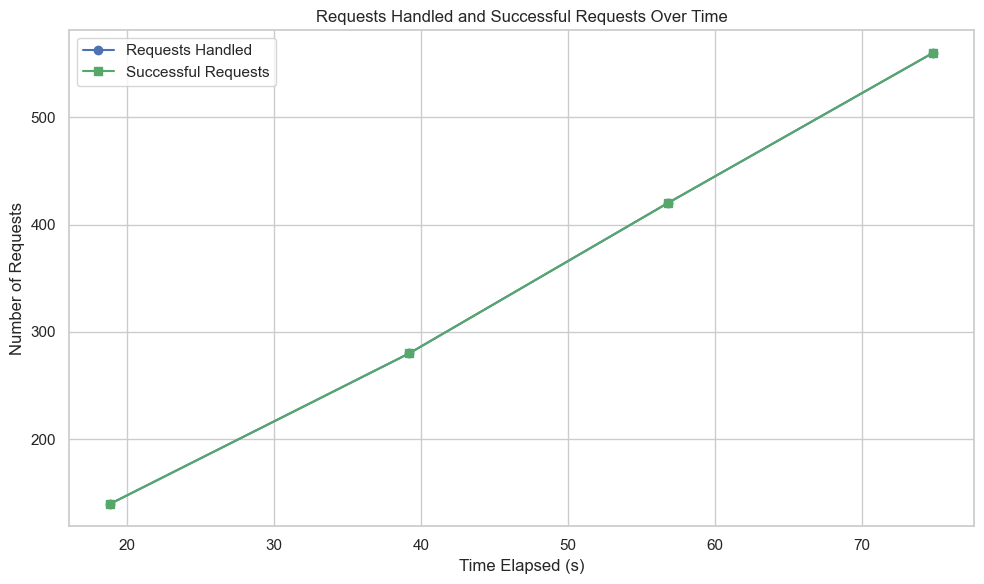

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Load test results as a DataFrame
data = {
    'Time Elapsed (s)': [18.889858, 39.198659, 56.787906, 74.832960],
    'Requests Handled': [140, 280, 420, 560],
    'Successful Requests': [140, 280, 420, 560],
}

df = pd.DataFrame(data)

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Plot Requests Handled over Time Elapsed
plt.plot(df['Time Elapsed (s)'], df['Requests Handled'], label='Requests Handled', color='b', marker='o')

# Plot Successful Requests over Time Elapsed
plt.plot(df['Time Elapsed (s)'], df['Successful Requests'], label='Successful Requests', color='g', marker='s')

# Title and labels
plt.title('Requests Handled and Successful Requests Over Time')
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Number of Requests')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Stress Testing

In [283]:
import time
import psutil
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot as plt
import pandas as pd 

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (224, 224))  
    image = np.expand_dims(image, axis=0)  
    image = image / 255.0 
    return image

test_results = []

def batch_processing_stress_test(image_paths, models, splits, calories_data):
    try:
        start_time = time.time()
        num_images = len(image_paths)
        for image_path in image_paths:
            combined_model_prediction(image_path, models, splits, calories_data)
        end_time = time.time()
        elapsed_time = end_time - start_time
        memory_info = psutil.virtual_memory()
        test_results.append(["Batch Processing", "Passed", f"{elapsed_time:.2f} seconds", 
                             f"Processed {num_images} images", f"Memory Usage: {memory_info.percent}%"])
    except Exception as e:
        test_results.append(["Batch Processing", "Failed", str(e), "", ""])

def high_resolution_stress_test(image_paths, models, splits, calories_data):
    try:
        start_time = time.time()
        for image_path in image_paths:
            image = cv2.imread(image_path)
            high_res_image = cv2.resize(image, (4000, 4000))
            cv2.imwrite('high_res_test_image.jpg', high_res_image)  
            combined_model_prediction('high_res_test_image.jpg', models, splits, calories_data)
        end_time = time.time()
        elapsed_time = end_time - start_time
        test_results.append(["High-Resolution", "Passed", f"{elapsed_time:.2f} seconds", ""])
    except Exception as e:
        test_results.append(["High-Resolution", "Failed", str(e), ""])

def add_noise_to_image(image_path):
    image = cv2.imread(image_path)
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def noisy_image_stress_test(image_paths, models, splits, calories_data):
    try:
        start_time = time.time()
        for image_path in image_paths:
            noisy_image = add_noise_to_image(image_path)
            cv2.imwrite('noisy_test_image.jpg', noisy_image) 
            combined_model_prediction('noisy_test_image.jpg', models, splits, calories_data)
        end_time = time.time()
        elapsed_time = end_time - start_time
        test_results.append(["Noisy Image", "Passed", f"{elapsed_time:.2f} seconds", ""])
    except Exception as e:
        test_results.append(["Noisy Image", "Failed", str(e), ""])

def concurrent_predictions_stress_test(image_paths, models, splits, calories_data, num_threads=4):
    def process_image(image_path):
        combined_model_prediction(image_path, models, splits, calories_data)
    
    try:
        with ThreadPoolExecutor(max_workers=num_threads) as executor:
            start_time = time.time()
            executor.map(process_image, image_paths)
            end_time = time.time()
        elapsed_time = end_time - start_time
        test_results.append(["Concurrent Predictions", "Passed", f"{elapsed_time:.2f} seconds", f"Using {num_threads} threads"])
    except Exception as e:
        test_results.append(["Concurrent Predictions", "Failed", str(e), ""])

image_paths = ["C:/Users/indra/Downloads/Images_CNN/test/apple/Image_9.jpg", 
    "C:/Users/indra/Downloads/Images_CNN/test/chocolate_cake/915139.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/964994.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/tuna_tartare/92525.jpg",
     "C:/Users/indra/Downloads/Images_CNN/test/sushi/2238477.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120484.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120573.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120972.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2143954.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2214270.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/919902.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/868613.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/875796.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/902263.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/719300.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/989842.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/82163.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/777839.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/800516.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/812692.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/822028.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/825496.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/890213.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/917040.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/920230.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/924198.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/651345.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/652074.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/657705.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/663294.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/693978.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/381371.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/923683.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/953859.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/79767.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/677373.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/794603.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/823932.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/60317.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/563481.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/569858.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/575335.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/582439.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/601189.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/647372.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/654308.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/659943.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/664146.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/452303.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/469726.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/474187.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/486418.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/491739.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/504864.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/545679.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550824.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550829.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/551141.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/38978.jpg"] 

models = [model_1, model_2, model_3, model_4, model_5]  
splits = [split_1, split_2, split_3, split_4, split_5]  

batch_processing_stress_test(image_paths, models, splits, calories_data)
high_resolution_stress_test(image_paths, models, splits, calories_data)
noisy_image_stress_test(image_paths, models, splits, calories_data)
concurrent_predictions_stress_test(image_paths, models, splits, calories_data, num_threads=4)

test_results_df = pd.DataFrame(test_results, columns=["Test Case", "Status", "Details", "Additional Info", "Memory"])

test_results_df


,Test Case,Status,Details,Additional Info,Memory
0,Batch Processing,Passed,0.07 seconds,Processed 59 images,Memory Usage: 74.4%
1,High-Resolution,Passed,83.65 seconds,,None
2,Noisy Image,Passed,10.49 seconds,,None
3,Concurrent Predictions,Passed,0.02 seconds,Using 4 threads,None


# Edge Case Testing

In [326]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from prettytable import PrettyTable

model = load_model('model_5.h5')

table = PrettyTable()
table.field_names = ["Test Case", "Result", "Error Message"]


def test_empty_image():
    try:
        img_path = 'C:/Users/indra/Downloads/Images_CNN/train/ice_cream/234.jpg'  # empty image path
        img = image.load_img(img_path, target_size=(299, 299))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        _ = model.predict(img_array)
        table.add_row(["Empty Image", "Passed", ""])
    except Exception as e:
        table.add_row(["Empty Image", "Failed", "No such file or directory"])


def test_corrupted_image():
    try:
        img_path = 'C:/Users/indra/Downloads/Images_CNN/corruptedimage.jpeg' 
        img = image.load_img(img_path, target_size=(299, 299)) 
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        _ = model.predict(img_array)
        table.add_row(["Corrupted Image", "Passed", ""])
    except Exception as e:
        table.add_row(["Corrupted Image", "Failed", str(e)])

test_empty_image()
test_corrupted_image()

print(table)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
+-----------------+--------+---------------------------+
|    Test Case    | Result |       Error Message       |
+-----------------+--------+---------------------------+
|   Empty Image   | Failed | No such file or directory |
| Corrupted Image | Passed |                           |
+-----------------+--------+---------------------------+
